In [1]:
import pandas as pd
import numpy as np
import sys
from fastparquet import ParquetFile

%matplotlib inline

In [2]:
# DISPLAY SETTINGS
pd.set_option("display.max.columns", None)   # Display all columns
pd.set_option("display.max.rows", None)      # Display all rows
pd.set_option("display.precision", 2)        # Display 2 decimal places

## Create

In [ ]:
# From clipboard
df = pd.read_clipboard()

In [3]:
# From parquet file
pf=ParquetFile('../data/address_latlon.parquet')
df=pf.to_pandas()

pf=ParquetFile('../data/purpleairdaily.parquet')
df1=pf.to_pandas()

pf=ParquetFile('../data/thingspeak.parquet')
df2=pf.to_pandas()

In [8]:
# https://www.kaggle.com/manasgarg/ipl/data?select=matches.csv
df3 = pd.read_csv('../data/matches.csv', delimiter=',')

In [ ]:
# Multiple files
from glob import glob

files = sorted(glob('data/*.csv'))
pd.concat((pd.read_csv(file) for file in files), ignore_index=True)    # Row-wise concat
pd.concat((pd.read_csv(file) for file in files), axis=1)    # Column-wise concat

## Explore

In [4]:
len(df), len(df1), len(df2)

(52321, 146017, 133199)

In [5]:
df.shape, df1.shape, df2.shape

((52321, 7), (146017, 16), (133199, 19))

In [6]:
df.head(2)

,city,country,county,lat,lon,state,zipcode
0,Kardia,Greece,None,40.47,22.99,None,575 00
1,Thessaloniki,Greece,None,40.63,22.96,None,546 36


In [7]:
df1.tail(2)

,a_h,device_loc_typ,high_reading_flag,hidden,sensor_id,sensor_name,lat,lon,parent_id,thingspeak_primary_id,thingspeak_primary_id_read_key,thingspeak_secondary_id,thingspeak_secondary_id_read_key,is_owner,datetime,sensorhash
index,,,,,,,,,,,,,,,,
289988,None,outside,NaN,false,24263,York Street,37.76,-122.41,NaN,673176,RVZS1D4CT4BOVW5L,673177,SRRW1CGPGXVGG6EN,0,201910272350,-5674343839165473289
289989,None,None,NaN,false,24264,York Street B,37.76,-122.41,24263.0,673178,LLWW6QYUHO5WRUO6,673179,LMVVF3MD7BLRWY72,0,201910272350,6398966441932156567


In [8]:
# Display first few values of a specific column
df2['created_at_x'].head(2)

index
0    2019-10-27T00:00:00Z
1    2019-10-27T00:10:00Z
Name: created_at_x, dtype: object

In [9]:
df.describe()   # Display stats only for numeric columns

,lat,lon
count,52321.00,52321.00
mean,37.45,-117.08
std,5.48,26.74
min,-53.63,-161.77
25%,37.43,-122.38
50%,37.76,-122.20
75%,37.86,-122.05
max,71.30,178.30


In [10]:
df.describe(include = np.object)   # Display descriptive stats for object columns

,city,country,county,state,zipcode
count,51961,52318,51775,52147,52080
unique,2206,107,921,319,3565
top,,,,,
freq,39227,39227,39227,39227,39227


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52321 entries, 0 to 52320
Data columns (total 7 columns):
city       51961 non-null object
country    52318 non-null object
county     51775 non-null object
lat        52321 non-null float64
lon        52321 non-null float64
state      52147 non-null object
zipcode    52080 non-null object
dtypes: float64(2), object(5)
memory usage: 2.8+ MB


In [12]:
df.dtypes

city        object
country     object
county      object
lat        float64
lon        float64
state       object
zipcode     object
dtype: object

In [13]:
df.isnull().sum()    # Find nulls
# df.isna().mean()

city       360
country      3
county     546
lat          0
lon          0
state      174
zipcode    241
dtype: int64

In [14]:
df.isnull().sum().sum()   # Total nulls across all columns

1324

In [15]:
df2.columns

Index(['created_at_x', '0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um',
       'pm1_0', 'pm10_0', 'sensorhash', 'created', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'uptime', 'rssi', 'temperature', 'humidity',
       'pm2_5_cf_1'],
      dtype='object')

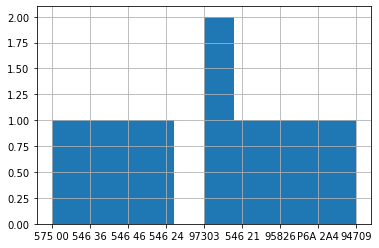

In [16]:
df['zipcode'][:10].hist()

## Slice and Dice

#### Subset of Columns by data type

In [17]:
# df.select_dtypes(include = 'number').head()    # Numeric columns only
# df.select_dtypes(include='object').head()      # Object columns only
df.select_dtypes(include=['number', 'object']).head(2)    # Number and Object columns only

,city,country,county,lat,lon,state,zipcode
0,Kardia,Greece,None,40.47,22.99,None,575 00
1,Thessaloniki,Greece,None,40.63,22.96,None,546 36


In [18]:
df.select_dtypes(exclude='object').head(2)    # Exclude float columns

,lat,lon
0,40.47,22.99
1,40.63,22.96


In [19]:
# Subset by column name
df1a = df1[['a_h', 'high_reading_flag', 'hidden', 'datetime', 'sensorhash']]
df1 = df1[['device_loc_typ', 'is_owner', 'sensor_id', 'sensor_name',  'parent_id', 'lat', 'lon', 'thingspeak_primary_id', 'thingspeak_primary_id_read_key', 'thingspeak_secondary_id',
                                          'thingspeak_secondary_id_read_key', 'sensorhash']]

#### Dropping columns and values

In [ ]:
# Drop rows if any NaN values are present
df = df.dropna(axis = 0)
# Drop columns if any NaN values are present
df = df.dropna(axis = 1)
# Drop columns in which more than 5% of values are missing
df.dropna(thresh=len(df)*0.95, axis=1)

In [ ]:
df.drop_duplicates(inplace=True)

In [20]:
# Drop unwanted columns
df2.drop(['pm2_5_cf_1', 'pm2_5_atm', 'pm10_0_atm'], axis = 1, inplace=True)

## Transformations

### Replacements

In [ ]:
# Replace all NaN values
df.fillna(value='Missing')

# To replace NaN values with the values in the previous row.
df.fillna(axis=0, method='ffill')

# To replace NaN values with the values in the previous column.
df.fillna(axis=1, method='ffill')

# Replace with the values in the next row
df.fillna(axis=0, method='bfill')

# Replace with the values in the next column
df.fillna(axis=1, method='bfill')

In [21]:
# Replace string "nan" with np.nan
df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0','pm10_0', 'created', 'pm1_0_atm', 'uptime',
               'rssi', 'temperature', 'humidity']] = df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
               'pm10_0', 'created', 'pm1_0_atm', 'uptime', 'rssi', 'temperature', 'humidity']].replace("nan", np.nan, regex=True)

In [ ]:
# To replace NaN values with the mean
df2['0_3um'].fillna(value=df2['0_3um'].mean(), inplace=True)

# replace with static values
df3.replace(to_replace='Calcutta', value='Kolkata', inplace=True)

#### Conversions

In [ ]:
df2['0_5um'] = df2['0_5um'].astype(int)
df2 = df2.astype({'0_5um': 'int'})    # use dictionary format { col: dtype }

In [23]:
# use to_numeric to convert the strings with Invalid characters
df2['2_5um'] = pd.to_numeric(df['2_5um'], errors='coerce')    # Single column
# Multiple columns
df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0','pm10_0', 'created', 'pm1_0_atm', 'uptime',
               'rssi', 'temperature', 'humidity']] = df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
               'pm10_0', 'created', 'pm1_0_atm', 'uptime', 'rssi', 'temperature', 'humidity']].apply(pd.to_numeric)

df2[['high_reading_flag','sensor_id','parent_id', 'is_owner']] = df2[['high_reading_flag','sensor_id','parent_id', 'is_owner']].astype(str)

In [ ]:
# Continuous to categorical
df['AgeGroup']=pd.cut(
    df['Age'], 
    bins=[0, 13, 19, 50, sys.maxsize], 
    labels=['<12', 'Teen', 'Adult', 'Old']
)

In [14]:
# Convert numeric column names into string values and move corresponding column values into a value column
df3 = df3[['id','city','winner','win_by_runs','win_by_wickets']]
df3 = df3.melt(id_vars=['id','city','winner'],var_name='WinStatTyp',value_name='WinStatVal')

## Additions

#### Merge

In [24]:
df2 = pd.merge(df2, df1,  how='left', left_on=['sensorhash'], right_on=['sensorhash'])
df2 = pd.merge(df2, df1a,  how='left', left_on=['sensorhash', 'created'], right_on=['sensorhash', 'datetime'])
df2 = pd.merge(df2, df,  how='left', left_on=['lat','lon'], right_on=['lat','lon'])

#### New columns

In [ ]:
# From existing column
ts_df['created_at'] = ts_df['created_at_x'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ").strftime("%Y/%m/%dT%H:%M"))

# Insert new col with static value at specified index
df3.insert(2,'match','IPL')

## Save

In [ ]:
df.to_csv(sep=',',index=False)